In [58]:
from skimage import draw
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = "gray"
plt.rcParams["figure.figsize"] = 12, 5
import numpy as np

image_size = 256, 256
image_center = image_size[0] // 2, image_size[1] // 2

base_image = np.zeros(image_size, dtype=np.uint8)
images = dict()

# draw cirlce
circle_image = base_image.copy()
rr, cc = draw.disk(image_center, 100, shape=image_size)
circle_image[rr, cc] = 1
images.setdefault("circle", []).append(circle_image)

# draw cut cirlce
cut_circle_image = base_image.copy()
rr, cc = draw.disk(image_center, 100, shape=image_size)
cut_circle_image[rr, cc] = 1
cut_circle_image[:, 2*image_size[1]//3:] = 0
images.setdefault("cut circle", []).append(cut_circle_image)

# draw ellipsis
ellipsis_image = base_image.copy()
rr, cc = draw.ellipse(*image_center, 80, 120, shape=image_size)
ellipsis_image[rr, cc] = 1
images.setdefault("ellipsis", []).append(ellipsis_image)

# draw rectangle
rectangle_image = base_image.copy()
width, height = 100, 50
x0, x1 = image_center[0] - width, image_center[0] + width
y0, y1 = image_center[1] - height, image_center[1] + height
rectangle_image[y0:y1, x0:x1] = 1
images.setdefault("rectangle", []).append(rectangle_image)

# draw square
square_image = base_image.copy()
width, height = 50, 50
x0, x1 = image_center[0] - width, image_center[0] + width
y0, y1 = image_center[1] - height, image_center[1] + height
square_image[y0:y1, x0:x1] = 1
images.setdefault("square", []).append(square_image)

In [59]:
import cv2

for key in images.keys():
    images[key].append(
        cv2.linearPolar(images[key][0], image_center, image_size[1]//2, cv2.WARP_FILL_OUTLIERS)
    )

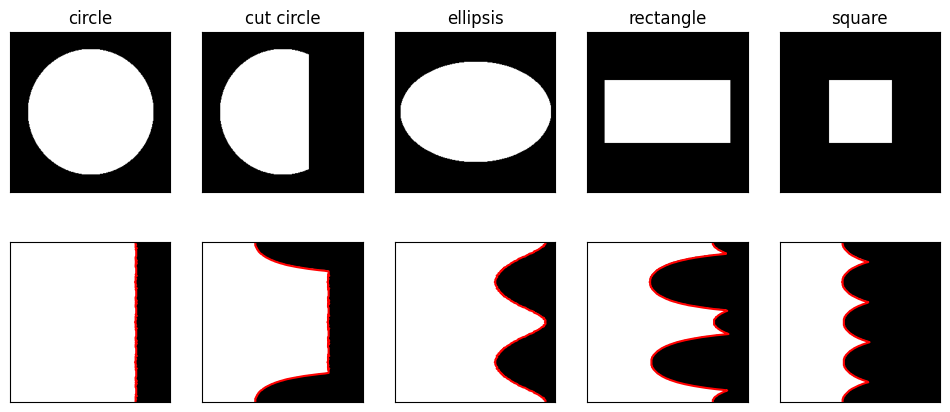

In [63]:
fig, axs = plt.subplots(2, len(images), sharex=True, sharey=True)

for i, key in enumerate(images.keys()):
    axs[0, i].set_title(key)
    for j in range(2):
        axs[j, i].imshow(images[key][j])
        axs[j, i].set_xticks([])
        axs[j, i].set_yticks([])
    axs[1, i].plot(np.argmin(images[key][1], axis=1), np.arange(image_size[0]), color="red")
    
plt.savefig("./figures.readme/polar_shapes.png")

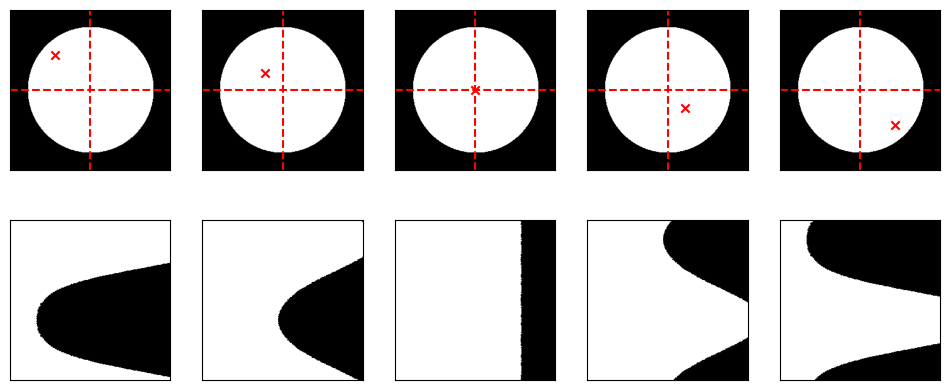

In [62]:
centers = (72, 100, 128, 156, 184)

fig, axs = plt.subplots(2, len(centers))

for i in range(len(centers)):
    axs[0, i].imshow(images["circle"][0])
    axs[0, i].scatter(centers[i], centers[i], marker="x", color="red")
    axs[0, i].axvline(image_center[1], color="red", ls="--")
    axs[0, i].axhline(image_center[0], color="red", ls="--")
    axs[1, i].imshow(
        cv2.linearPolar(images["circle"][0], (centers[i], centers[i]), image_size[1]//2, cv2.WARP_FILL_OUTLIERS)
    )
    
    for j in range(2):
        axs[j, i].set_xticks([])
        axs[j, i].set_yticks([])

plt.savefig("./figures.readme/center_polar_transformation.png")

TypeError: Axes3D.plot_surface() missing 2 required positional arguments: 'Y' and 'Z'

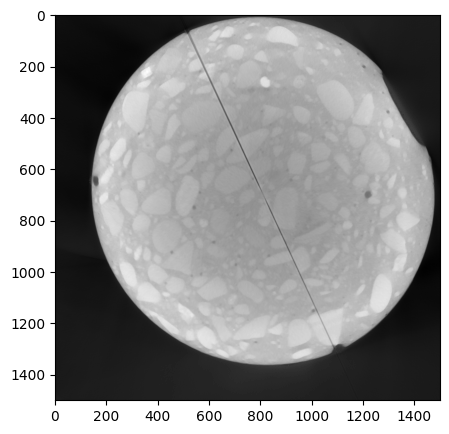

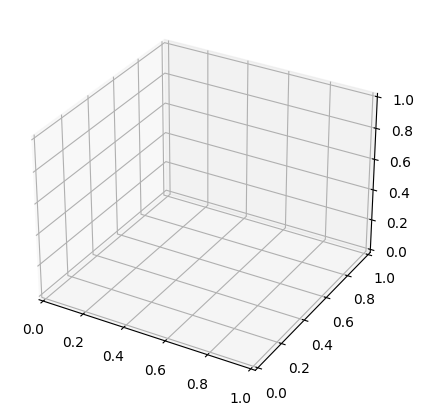

In [74]:
import cv2 

image_path = "/scratch/SPP/ct_images/vg-data_EnghardtBetonHelix-Probe1/1_Probe1_0000,00_1001.tif"

image = cv2.imread(image_path, cv2.IMREAD_ANYDEPTH)[slice(325, 1825), slice(390, 1890)]

plt.imshow(image)


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")




ax.plot_surface(image)

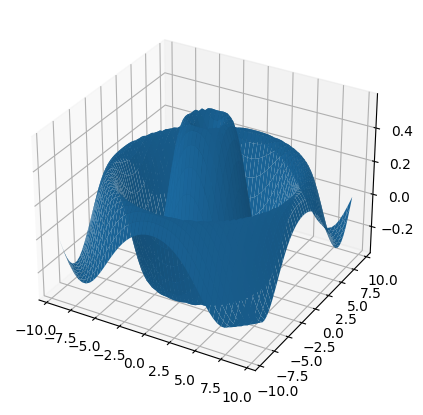

In [71]:
from scipy.special import jv, yv

x = np.linspace(-3, 3) * np.pi
X, Y = np.meshgrid(x,x)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(X, Y, jv(1, np.hypot(X, Y)))